# K-means clustering

Clustering(군집화)의 목적은 관측값을 서로 유사성이 높은 것끼리 묶어 다수의 그룹으로 만드는 것으로 동일 그룹 내 구성원 간의 유사성은 매우 높지만 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것입니다.

- 자금 세탁 방지를 위한 척도로서, 이상 탐지를 통해 의심스러운 자금 흐름이나 개인을 찾아낼 수 있습니다.
- 생물학에서는 유사한 패턴을 가진 유전자 그룹을 찾는 데 사용할 수 있습니다.
- 마케팅 분석에서 유사한 고객 세그먼트를 찾기 위해 군집화를 사용하고 각기 다른 고객 세그먼트에 대해 서로 다른 마케팅 전략을 적용할 수 있습니다.

K-means clustering은 반복적인 작업으로 각 클러스터의 현재 중심을 구성원의 평균 위치로 옮기고 중심이 옮겨진 위치로부터 가장 가까운 점들로 다시 구성원을 형성한 후 새로운 평균을 구하고 위치를 옮기는 작업을 반복합니다. 이 반복은 클러스터의 중심이 더 이상 유의미한 변화가 없거나 미리 설정해둔 반복 횟수에 도달하면 멈춥니다.

K-means의 비용함수 : 클러스터의 중심과 클러스터에 속한 관측값 사이의 유클리디언 거리

## 1. 최적 클러스터 개수와 클러스터 평가

사실 적절한 클러스터의 개수를 정하는 것은 과학이라기보다 예술의 경지라 할 수 있습니다.

### Elbow method(엘보 기법)
K-means clustering에서 최적 클러스터 개수를 찾기 위해서는 엘보 기법을 사용해야 해야합니다. Cluster의 갯수인 $k$가 증가하게 되면, 비용함수는 줄어들게 됩니다. 하지만 어느 시점이 지나게 되면 비용함수의 저하가 크게 발생하지 않게 됩니다. 이 시점을 elbow라고 부르고, 더 이상 클러스터를 증가시키지 않아도 될 최적 시점으로 볼 수 있습니다.

### Silhouette coefficient(실루엣 계수)
실루엣 계수는 클러스터가 어느 정도 밀집해 있는지 알아보는 척도입니다. 이 값이 높을수록 클러스터의 품질이 우수하다는 것을 의미합니다. 실루엣 계수는 클러스터들이 잘 분리돼 있으면 높은 값을 갖고, 서로 겹치면 낮은 값을 갖는데, -1부터 1사이의 어느 한 값을 가지며 값이 클수록 좋습니다.

실루엣 계수는 각 개체별로 계산하는데, 개체의 집합에 관해서는 개별 개체 점수의 평균을 계산한다.
$$s=\frac{(b-a)}{\text{max}(a,b)}$$
 - $a$ : 같은 클러스터 내의 다른 관측값과의 평균 거리
 - $b$ : 가장 가까운 다른 클러스터 내에 속한 모든 관측값과의 평균 거리

## 2. 데이터 로딩

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris['data']
y = iris['target']

In [5]:
print(x.shape)
print('유니크한 class : {}'.format(set(y)))

(150, 4)
유니크한 class : {0, 1, 2}


## 3. Clustering 알고리즘 수행
실제로는 몇 개의 클러스터가 필요한지 사전에 알 수 있는 방법은 없습니다. 시행착오를 거쳐 숫자를 찾아낼 수 밖에 없습니다. 우선, 사전정보가 있기 때문에 클러스터를 3이라고 하겠습니다.

In [6]:
k_means_fit = KMeans(n_clusters=3, max_iter=300)
k_means_fit.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

`labels_`를 이용하면, 데이터 샘플에 할당된 cluster를 알 수 있습니다.

In [7]:
pd.crosstab(
    y, 
    k_means_fit.labels_, 
    rownames=['Actual'], 
    colnames=['Predicted']
)

Predicted,0,1,2
Actual,,,
0,0,50,0
1,2,0,48
2,36,0,14


In [8]:
silhouette_score(x, k_means_fit.labels_, metric='euclidean')

0.5525919445213676

## 4. Clustering의 품질 측정

### (1) 실루엣 계수

In [9]:
for i in range(2, 10):
    k_means_fit = KMeans(n_clusters=i, max_iter=300)
    k_means_fit.fit(x)
    print('For K value : {}, 실루엣 계수 : {}'\
          .format(i, silhouette_score(x, k_means_fit.labels_, metric='euclidean')))

For K value : 2, 실루엣 계수 : 0.6808136202713507
For K value : 3, 실루엣 계수 : 0.5525919445213676
For K value : 4, 실루엣 계수 : 0.49782569007544936
For K value : 5, 실루엣 계수 : 0.48851755085386317
For K value : 6, 실루엣 계수 : 0.36339909661124525
For K value : 7, 실루엣 계수 : 0.3577679996440562
For K value : 8, 실루엣 계수 : 0.3480542239457266
For K value : 9, 실루엣 계수 : 0.32409915327705024


### (2) 엘보 기법

In [10]:
K = range(1, 10)

clusters = [KMeans(n_clusters=k).fit(x) for k in K]
centroids = [cluster.cluster_centers_ for cluster in clusters]

In [11]:
distances = [cdist(x, centroid, 'euclidean') for centroid in centroids]

> 데이터에 할당된 클러스터의 centroid와의 거리의 평균 (within the clusters)

In [12]:
# 각 데이터에서 가장 가까운 클러스터를 찾고, 그 클러스터와의 거리를 구합니다.
dist = [np.min(d, axis=1) for d in distances]
# 데이터에 할당된 클러스터의 centroid와의 거리와의 평균을 구합니다.
avg_within_ss = [sum(d) / x.shape[0] for d in dist]

Text(0, 0.5, 'Average within-cluster sum of squares')

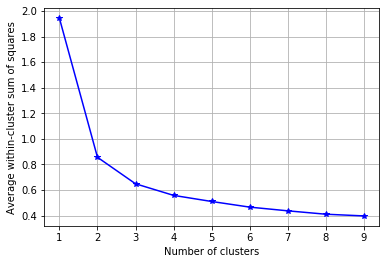

In [13]:
# 엘보곡선을 그립니다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avg_within_ss, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')

그래프를 살펴보면 클러스터의 갯수가 3개보다 커지면, 기울기가 급격하게 변합니다. 따라서 클러스터의 갯수가 3개일 때 최적이라고 볼 수 있습니다.

> 해석된 분산의 비율

$$\frac{\text{total distance sum of squares} - \text{within cluster distance sum of squares}}{\text{total distance sum of squares}}$$

In [14]:
# 클러스터 내 제곱의 합계 총합
within_cluster_ss = [sum(d**2) for d in dist]

In [15]:
total_ss = sum(pdist(x)**2 / x.shape[0])
# 클러스터 간 제곱의 합계 총합
between_ss = total_ss - within_cluster_ss

Text(0, 0.5, 'Percentage of variance explained')

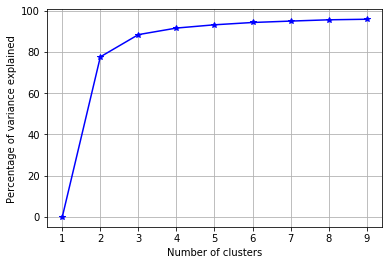

In [16]:
# 엘보곡선을 그립니다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, between_ss/total_ss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')

최적 클러스터의 개수로 결정되기 위해서 분산이 최소한 80%를 넘어야 합니다.

> Inertia

**Inertia** can be recognized as a measure of how **internally coherent clusters are**.

Inertia is the sum of the squared distances between each training instance and its closest centroid.

In [13]:
inertias = [c.inertia_ for c in clusters]

Text(0, 0.5, 'Inertia')

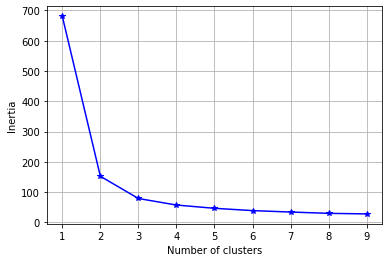

In [15]:
# 엘보곡선을 그립니다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, inertias, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

따라서 
 - 실루엣 계수
 - 데이터와 데이터에 할당된 centroid 간의 거리에 따른 엘보 기법
 - 해석된 분산에 따른 엘보 기법
 
에 따라, 최적의 클러스터가 3임을 알 수 있습니다.